In [237]:
import opendatasets as od
import pandas as pd
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [238]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000001'

In [239]:
raw_df = pd.read_csv('bank.csv')

In [240]:
raw_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [241]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [242]:
raw_df.age.describe()

count    11162.000000
mean        41.231948
std         11.913369
min         18.000000
25%         32.000000
50%         39.000000
75%         49.000000
max         95.000000
Name: age, dtype: float64

In [243]:
fig = px.histogram(raw_df, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [244]:
raw_df.loan.value_counts()

no     9702
yes    1460
Name: loan, dtype: int64

In [245]:
raw_df.job.unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [246]:
fig = px.bar(raw_df, 
             x='job', 
             
             title = "Types of Jobs")
fig.update_layout(bargap=0.1)
#fig.color('red')

fig.show()

In [247]:
fig = px.histogram(raw_df, 
                   x='balance', 
                   marginal='box', 
                   color='education', 
                   color_discrete_sequence=['green', 'grey', 'orange', 'red'], 
                   title='Balance')
fig.update_layout(bargap=0.1)
fig.show()

Correlation

Text(0.5, 1.0, 'Correlation Matrix')

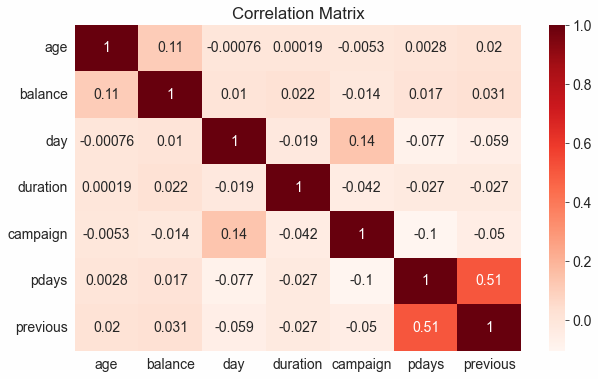

In [248]:
sns.heatmap(raw_df.corr(), cmap = 'Reds', annot = True)
plt.title('Correlation Matrix')

It looks like none of the features have direct dependency on each other as correlation between the numeric columns is very less

In [249]:
raw_df.deposit.value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [250]:
raw_df.duration.describe

<bound method NDFrame.describe of 0        1042
1        1467
2        1389
3         579
4         673
         ... 
11157     257
11158      83
11159     156
11160       9
11161     628
Name: duration, Length: 11162, dtype: int64>

In [251]:
raw_df[raw_df.poutcome == 'success']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
899,56,technician,married,secondary,no,589,yes,no,unknown,23,oct,518,1,147,2,success,yes
951,53,retired,married,tertiary,no,2269,no,no,cellular,17,nov,1091,2,150,1,success,yes
985,46,unemployed,divorced,secondary,no,3354,yes,no,cellular,19,nov,522,1,174,1,success,yes
994,40,management,married,tertiary,no,3352,yes,no,cellular,19,nov,639,2,27,1,success,yes
1151,31,management,married,tertiary,no,1331,no,no,cellular,3,feb,182,2,90,1,success,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10798,67,technician,married,secondary,no,0,no,no,cellular,13,aug,1152,2,188,1,success,no
10911,33,technician,married,secondary,no,348,yes,no,cellular,7,may,263,2,294,1,success,no
10918,36,entrepreneur,single,tertiary,no,145,yes,no,cellular,18,may,450,2,304,2,success,no
11069,33,self-employed,single,tertiary,no,658,yes,no,cellular,12,apr,93,1,173,2,success,no


It looks like the target columns have good number both yes and no's

## Training, Validation and Test Data sets

In [252]:
from sklearn.model_selection import train_test_split
train_val_df, test_df = train_test_split(raw_df, test_size = 0.2, random_state = 40)
train_df, val_df = train_test_split(train_val_df,test_size = 0.25, random_state = 40)

In [253]:
print('train_df.shape:', train_df.shape)
print('val_df.shape:', val_df.shape)
print('test_df.shape:', test_df.shape)

train_df.shape: (6696, 17)
val_df.shape: (2233, 17)
test_df.shape: (2233, 17)


In [254]:
train_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
6145,36,management,divorced,tertiary,no,102,yes,no,cellular,14,apr,114,1,-1,0,unknown,no
10261,54,retired,single,primary,no,767,no,no,unknown,9,jun,42,2,-1,0,unknown,no
10150,31,blue-collar,married,secondary,no,-720,yes,yes,unknown,15,may,112,2,-1,0,unknown,no
3634,59,management,married,tertiary,no,5397,no,no,cellular,23,jun,671,3,-1,0,unknown,yes
6404,46,services,married,secondary,no,1757,yes,no,unknown,14,may,380,4,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8201,29,management,married,tertiary,no,941,yes,no,unknown,4,jun,570,11,-1,0,unknown,no
6466,51,management,married,tertiary,no,-15,no,no,cellular,25,jul,212,2,-1,0,unknown,no
8565,38,blue-collar,married,primary,no,7944,no,no,unknown,17,jun,116,3,-1,0,unknown,no
3586,49,admin.,single,tertiary,no,228,yes,no,cellular,2,jun,407,1,92,1,success,yes


In [255]:
val_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
10453,51,management,divorced,tertiary,no,1937,yes,no,cellular,18,nov,185,4,152,11,other,no
4295,42,admin.,divorced,secondary,no,527,no,yes,cellular,22,oct,181,1,185,1,success,yes
2721,40,blue-collar,married,secondary,no,1451,no,no,cellular,30,sep,117,1,121,1,success,yes
1052,30,services,single,secondary,no,495,yes,no,cellular,21,nov,641,1,-1,0,unknown,yes
4749,27,technician,single,secondary,no,1742,yes,no,unknown,16,may,787,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7965,26,student,single,secondary,no,502,yes,no,telephone,7,may,82,1,-1,0,unknown,no
1501,31,technician,married,secondary,no,183,no,no,cellular,16,apr,495,1,-1,0,unknown,yes
9666,35,technician,married,secondary,no,2019,yes,yes,cellular,18,nov,83,2,144,1,failure,no
188,32,services,married,secondary,no,-34,yes,no,unknown,30,may,1236,2,-1,0,unknown,yes


In [256]:
test_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
8211,30,services,single,secondary,no,9,no,yes,cellular,29,jan,194,2,205,2,failure,no
9207,31,technician,single,secondary,no,1970,no,no,telephone,17,apr,284,3,-1,0,unknown,no
8491,28,self-employed,single,tertiary,no,1579,no,no,cellular,14,oct,122,3,-1,0,unknown,no
8918,53,admin.,divorced,secondary,no,1151,yes,no,unknown,5,may,412,1,-1,0,unknown,no
2256,29,student,single,secondary,no,1779,no,no,cellular,4,jun,400,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3678,48,management,single,tertiary,no,159,no,no,telephone,7,jul,229,1,251,6,success,yes
1449,28,management,divorced,tertiary,no,229,yes,no,cellular,9,apr,1042,2,315,2,other,yes
3562,31,technician,single,secondary,no,846,no,no,cellular,26,may,405,3,205,2,failure,yes
4266,35,management,single,tertiary,no,7918,no,no,cellular,7,sep,497,1,-1,0,unknown,yes


## Identifying Input and Target Columns

In [257]:
input_cols = list(train_df.columns)[:-1]
target_col = 'deposit'
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [258]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [259]:
numeric_cols = train_inputs.select_dtypes(include = np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [260]:
train_df[numeric_cols].describe()

,age,balance,day,duration,campaign,pdays,previous
count,6696.000000,6696.000000,6696.000000,6696.000000,6696.000000,6696.000000,6696.000000
mean,41.221924,1510.419355,15.630675,371.557796,2.519116,51.206392,0.834229
std,11.958393,3152.891613,8.404271,344.980972,2.770957,109.642689,2.298813
min,18.000000,-2712.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,118.750000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,543.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1707.250000,21.000000,502.000000,3.000000,2.000000,1.000000
max,95.000000,81204.000000,31.000000,3183.000000,63.000000,854.000000,55.000000


In [261]:
print('Numerical Coloumns:', numeric_cols)
print('Categorical columns:', categorical_cols)

Numerical Coloumns: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [262]:
train_inputs[categorical_cols].nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
dtype: int64

## Imputing of Missing Data

In [263]:
train_df[numeric_cols].isna().sum()

age         0
balance     0
day         0
duration    0
campaign    0
pdays       0
previous    0
dtype: int64

Imputing is not required as we didn't find any null values

## Scaling of Numeric Values

In [264]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(raw_df[numeric_cols])

MinMaxScaler()

In [265]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [266]:
train_inputs

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
6145,0.233766,management,divorced,tertiary,no,0.078920,yes,no,cellular,0.433333,apr,0.028873,0.000000,0.000000,0.000000,unknown
10261,0.467532,retired,single,primary,no,0.086473,no,no,unknown,0.266667,jun,0.010312,0.016129,0.000000,0.000000,unknown
10150,0.168831,blue-collar,married,secondary,no,0.069585,yes,yes,unknown,0.466667,may,0.028358,0.016129,0.000000,0.000000,unknown
3634,0.532468,management,married,tertiary,no,0.139056,no,no,cellular,0.733333,jun,0.172467,0.032258,0.000000,0.000000,unknown
6404,0.363636,services,married,secondary,no,0.097716,yes,no,unknown,0.433333,may,0.097448,0.048387,0.000000,0.000000,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8201,0.142857,management,married,tertiary,no,0.088449,yes,no,unknown,0.100000,jun,0.146429,0.161290,0.000000,0.000000,unknown
6466,0.428571,management,married,tertiary,no,0.077591,no,no,cellular,0.800000,jul,0.054138,0.016129,0.000000,0.000000,unknown
8565,0.259740,blue-collar,married,primary,no,0.167982,no,no,unknown,0.533333,jun,0.029389,0.032258,0.000000,0.000000,unknown
3586,0.402597,admin.,single,tertiary,no,0.080351,yes,no,cellular,0.033333,jun,0.104408,0.000000,0.108772,0.017241,success


In [267]:
val_inputs

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
10453,0.428571,management,divorced,tertiary,no,0.099760,yes,no,cellular,0.566667,nov,0.047177,0.048387,0.178947,0.189655,other
4295,0.311688,admin.,divorced,secondary,no,0.083747,no,yes,cellular,0.700000,oct,0.046146,0.000000,0.217544,0.017241,success
2721,0.285714,blue-collar,married,secondary,no,0.094241,no,no,cellular,0.966667,sep,0.029647,0.000000,0.142690,0.017241,success
1052,0.155844,services,single,secondary,no,0.083383,yes,no,cellular,0.666667,nov,0.164733,0.000000,0.000000,0.000000,unknown
4749,0.116883,technician,single,secondary,no,0.097546,yes,no,unknown,0.500000,may,0.202372,0.000000,0.000000,0.000000,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7965,0.103896,student,single,secondary,no,0.083463,yes,no,telephone,0.200000,may,0.020624,0.000000,0.000000,0.000000,unknown
1501,0.168831,technician,married,secondary,no,0.079840,no,no,cellular,0.500000,apr,0.127095,0.000000,0.000000,0.000000,unknown
9666,0.220779,technician,married,secondary,no,0.100692,yes,yes,cellular,0.566667,nov,0.020882,0.016129,0.169591,0.017241,failure
188,0.181818,services,married,secondary,no,0.077376,yes,no,unknown,0.966667,may,0.318123,0.016129,0.000000,0.000000,unknown


In [268]:
test_inputs

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
8211,0.155844,services,single,secondary,no,0.077864,no,yes,cellular,0.933333,jan,0.049497,0.016129,0.240936,0.034483,failure
9207,0.168831,technician,single,secondary,no,0.100135,no,no,telephone,0.533333,apr,0.072699,0.032258,0.000000,0.000000,unknown
8491,0.129870,self-employed,single,tertiary,no,0.095695,no,no,cellular,0.433333,oct,0.030936,0.032258,0.000000,0.000000,unknown
8918,0.454545,admin.,divorced,secondary,no,0.090834,yes,no,unknown,0.133333,may,0.105697,0.000000,0.000000,0.000000,unknown
2256,0.142857,student,single,secondary,no,0.097966,no,no,cellular,0.100000,jun,0.102604,0.000000,0.000000,0.000000,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3678,0.389610,management,single,tertiary,no,0.079568,no,no,telephone,0.200000,jul,0.058520,0.000000,0.294737,0.103448,success
1449,0.129870,management,divorced,tertiary,no,0.080363,yes,no,cellular,0.266667,apr,0.268110,0.016129,0.369591,0.034483,other
3562,0.168831,technician,single,secondary,no,0.087370,no,no,cellular,0.833333,may,0.103893,0.032258,0.240936,0.034483,failure
4266,0.220779,management,single,tertiary,no,0.167687,no,no,cellular,0.200000,sep,0.127610,0.000000,0.000000,0.000000,unknown


## Encoding Categorical Data

In [269]:
raw_df[categorical_cols].nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
dtype: int64

In [270]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore')
encoder.fit(raw_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [271]:
raw_df[categorical_cols]

,job,marital,education,default,housing,loan,contact,month,poutcome
0,admin.,married,secondary,no,yes,no,unknown,may,unknown
1,admin.,married,secondary,no,no,no,unknown,may,unknown
2,technician,married,secondary,no,yes,no,unknown,may,unknown
3,services,married,secondary,no,yes,no,unknown,may,unknown
4,admin.,married,tertiary,no,no,no,unknown,may,unknown
...,...,...,...,...,...,...,...,...,...
11157,blue-collar,single,primary,no,yes,no,cellular,apr,unknown
11158,services,married,secondary,no,no,no,unknown,jun,unknown
11159,technician,single,secondary,no,no,no,cellular,aug,unknown
11160,technician,married,secondary,no,no,yes,cellular,may,failure


In [272]:
encoded_cols  = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary', 'education_tertiary', 'education_unknown', 'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular', 'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']


In [273]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [274]:
train_inputs.shape

(6696, 60)

In [275]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (6696, 60)
train_targets: (6696,)
val_inputs: (2233, 60)
val_targets: (2233,)
test_inputs: (2233, 60)
test_targets: (2233,)


In [276]:
X_train = train_inputs[numeric_cols+encoded_cols]
X_val = val_inputs[numeric_cols+encoded_cols]
X_test = test_inputs[numeric_cols+encoded_cols]

## Training of the Model

### Logistic Regresssion model

In [277]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
lrmodel = LogisticRegression(solver = 'liblinear')
lrmodel.fit(X_train,train_targets)

LogisticRegression(solver='liblinear')

In [278]:
print(lrmodel.coef_)
print(lrmodel.intercept_)

[[ 1.73613657e-02  1.53924046e+00  1.21976941e-01  1.60140285e+01
  -2.71042878e+00 -9.30392580e-02  4.26677439e-01 -3.32857318e-02
  -1.68440867e-01 -1.31560107e-01 -3.60290453e-01 -1.51462916e-01
   3.58202055e-01 -2.64207655e-01 -1.67146353e-01  6.96512149e-01
  -5.82044445e-02  4.94329041e-02 -9.04549440e-02 -9.22902249e-02
  -2.43186694e-01  1.45705563e-02 -2.36845577e-01 -8.09455699e-02
   1.02521245e-01 -1.05636461e-01 -5.37925827e-02 -2.67113780e-01
   1.53767454e-01 -4.74673817e-01  3.93713776e-02 -3.60277740e-01
   4.09203184e-01  2.81624147e-01 -1.01173369e+00 -1.36745534e-01
  -8.55751641e-01  9.81801697e-01 -3.01972179e-01 -1.26777751e+00
  -9.96542713e-01  1.65000972e-01  1.86609004e+00 -6.82831878e-01
  -9.05205241e-01  9.45915936e-01  8.67111694e-01 -5.46908374e-01
  -4.43395538e-01  1.52875231e+00 -8.59354757e-01]]
[-0.32090636]


In [279]:
train_preds = lrmodel.predict(X_train)
accuracy_score(train_targets,train_preds)


0.8245221027479092

In [280]:
def lr_predict_and_plot(inputs,targets, name = ''):
    preds = lrmodel.predict(inputs)
    
    accuracy = accuracy_score(targets,preds)
    
    print("Accuracy Score: ", accuracy*100)
    
    cf = confusion_matrix(targets,preds, normalize = 'true' )
    plt.figure
    sns.heatmap(cf, annot = True)
    plt.xlabel('Predictions')
    plt.ylabel('Targets')
    plt.title('{} Confusion Matrix' .format(name))
    
    return preds

Accuracy Score:  82.45221027479091


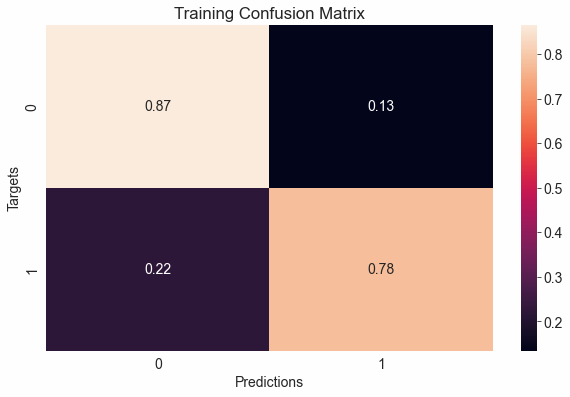

In [281]:
train_preds = lr_predict_and_plot(X_train, train_targets, name = 'Training')

Accuracy Score:  82.40035826242723


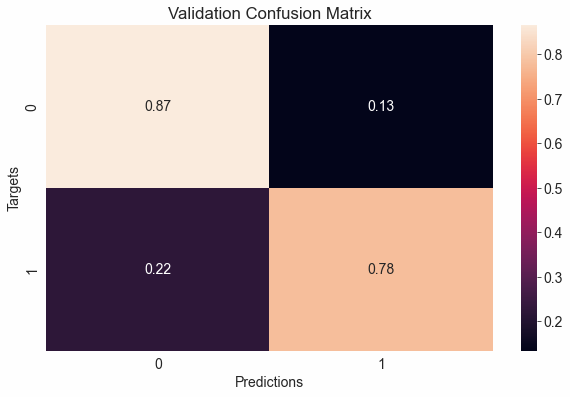

In [282]:
val_preds = lr_predict_and_plot(X_val, val_targets, name = 'Validation')

Accuracy Score:  81.8629646215853


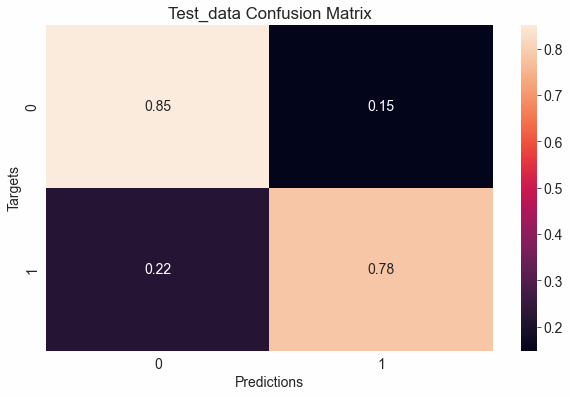

In [283]:
test_preds = lr_predict_and_plot(X_test, test_targets, name = 'Test_data')

### Decision Tree Classifier

In [284]:
from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier(random_state = 42)
dtmodel.fit(X_train,train_targets)

DecisionTreeClassifier(random_state=42)

Let's evaluate the model

In [285]:
train_preds = dtmodel.predict(X_train)

In [286]:
accuracy_score(train_targets,train_preds)

1.0

In [287]:
vel_preds = dtmodel.predict(X_val)
accuracy_score(val_targets,val_preds)

0.8240035826242723

In [288]:
test_preds = dtmodel.predict(X_test)
accuracy_score(test_targets,test_preds)

0.7922077922077922

In [289]:
print ("Decision Tree model accuracy_scores: ")
print ('Training_accuracy: ',accuracy_score(train_targets,train_preds))
print ('Validation accuracy: ',accuracy_score(val_targets,val_preds))
print ('Testing Accuracy: ', accuracy_score(test_targets,test_preds))

Decision Tree model accuracy_scores: 
Training_accuracy:  1.0
Validation accuracy:  0.8240035826242723
Testing Accuracy:  0.7922077922077922


#### Hyperparameter tuning

In [315]:
dtmodel1 = DecisionTreeClassifier(max_depth=11, random_state=40)
dtmodel1.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=11, random_state=40)

In [316]:
print ('Training_accuracy: ',dtmodel1.score(X_train,train_targets))
print ('Validation accuracy: ',dtmodel1.score(X_val,val_targets))
print ('Testing Accuracy: ', dtmodel1.score(X_test,test_targets))

Training_accuracy:  0.8950119474313023
Validation accuracy:  0.8132557098074339
Testing Accuracy:  0.8168383340797134


In [301]:
dtmodel1.classes_

array(['no', 'yes'], dtype=object)

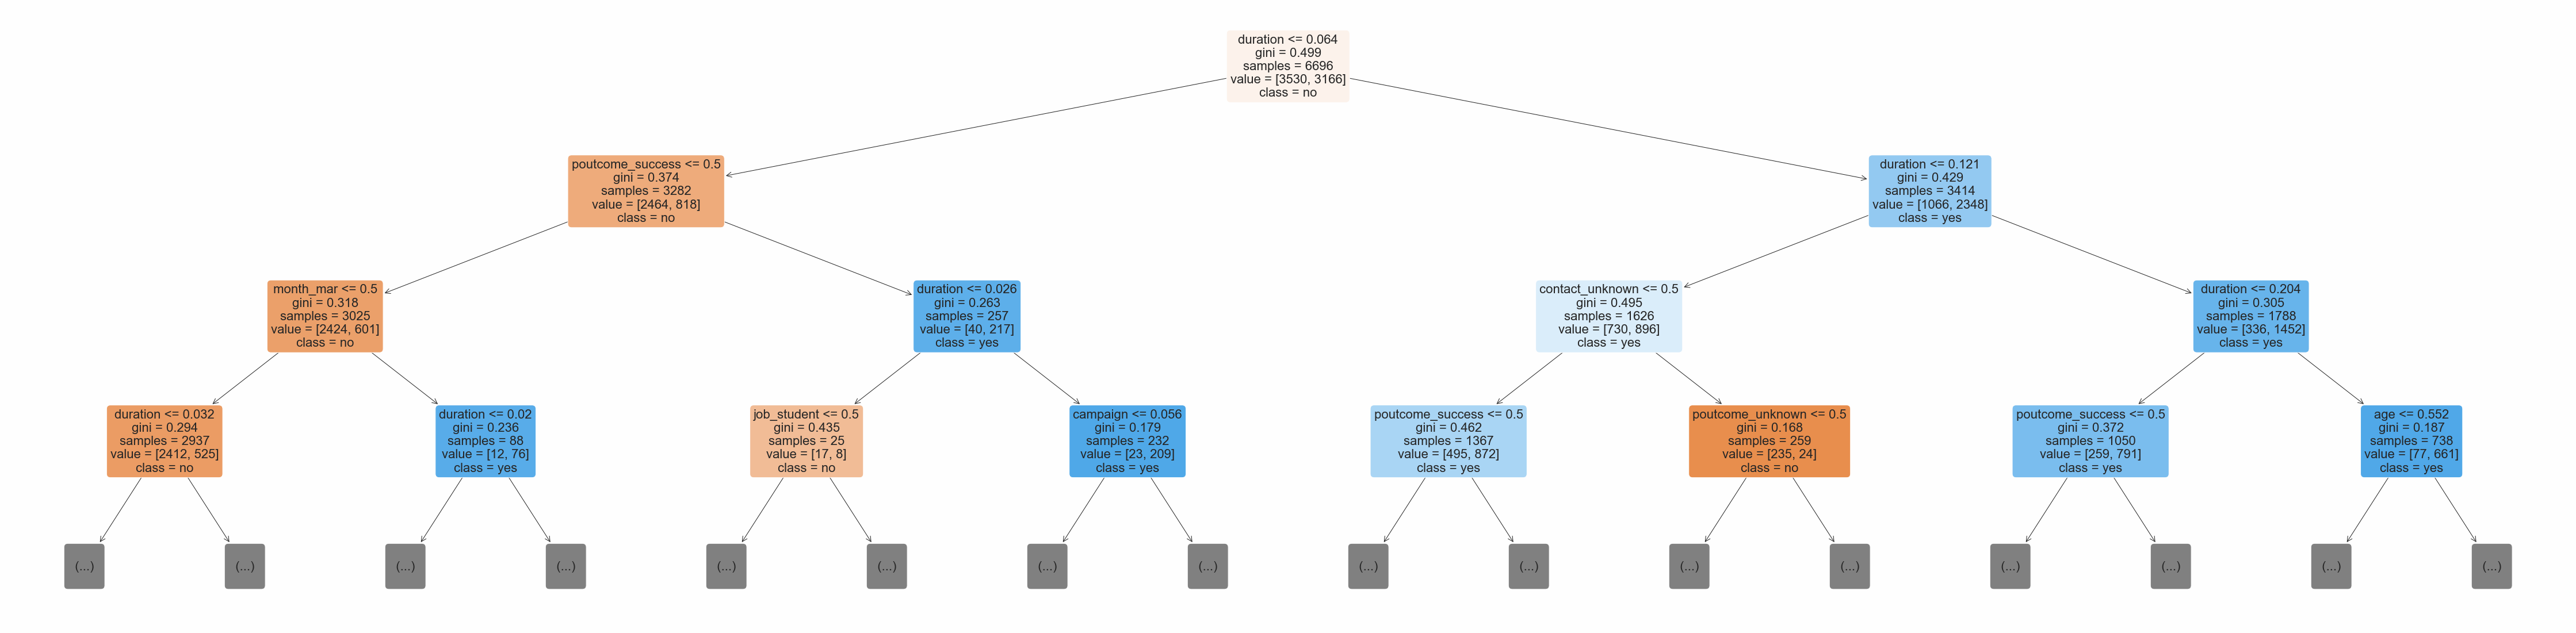

In [304]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(80,20))
plot_tree(dtmodel1, feature_names=X_train.columns,max_depth =3, filled=True, rounded=True, class_names=model.classes_);

### Random Forest Model

In [318]:
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(n_jobs=-1, random_state=40)
rfmodel.fit(X_train, train_targets)

RandomForestClassifier(n_jobs=-1, random_state=40)

In [319]:
print ('Training_accuracy: ',rfmodel.score(X_train,train_targets))
print ('Validation accuracy: ',rfmodel.score(X_val,val_targets))
print ('Testing Accuracy: ', rfmodel.score(X_test,test_targets))

Training_accuracy:  1.0
Validation accuracy:  0.8575906851768921
Testing Accuracy:  0.8504254366323332


In [320]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rfmodel.feature_importances_
}).sort_values('importance', ascending=False)

In [321]:
importance_df.head(5)

,feature,importance
3,duration,0.322507
1,balance,0.077599
0,age,0.072804
2,day,0.063044
4,campaign,0.035872


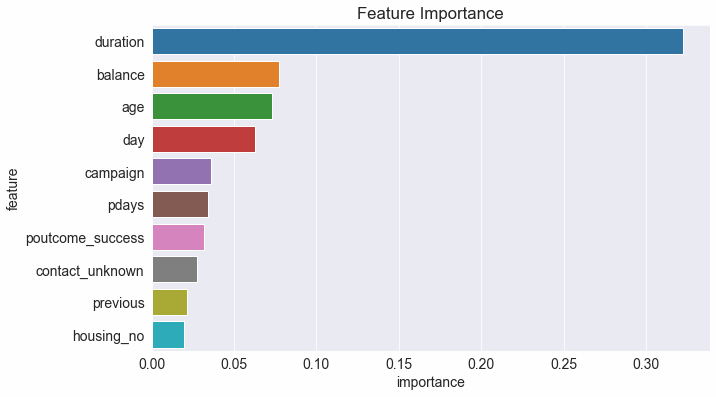

In [322]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

#### Hyperparameter  tuning with random forest

In [323]:
base_rfmodel = RandomForestClassifier(random_state=40, n_jobs=-1).fit(X_train, train_targets)


In [325]:
base_train_acc = base_rfmodel.score(X_train, train_targets)
base_val_acc = base_rfmodel.score(X_val, val_targets)
base_accs = base_train_acc, base_val_acc
base_accs

(1.0, 0.8575906851768921)

tuning using n_estimators

In [333]:
rfmodel1 = RandomForestClassifier(random_state=40, n_jobs=-1, n_estimators=1000)
rfmodel1.fit(X_train, train_targets)
rfmodel1.score(X_train, train_targets), rfmodel1.score(X_val, val_targets)

(1.0, 0.8526645768025078)

changing in n_estimator value is not improvising the score by a significant level. Maybe other hyperparameters affect the score. Let's try max_dept and max_leaf_nodes

### max_depth

In [343]:
def test_params(**params):
    rfmodel2 = RandomForestClassifier(random_state=40, n_jobs=-1, **params).fit(X_train, train_targets)
    return rfmodel2.score(X_train, train_targets), rfmodel2.score(X_val, val_targets)

In [349]:
test_params(max_depth=1000)

(1.0, 0.8575906851768921)

Changing the Maximum depth of the model is not changing the accuracy of the model with respect to base model. Let's try max_leaf_nodes

In [356]:
test_params(max_leaf_nodes=2**20)

(1.0, 0.8571428571428571)

It looks like max_leaf_nodes are also not affecting the model much

In [363]:
test_params(max_features=10)

(1.0, 0.8589341692789969)

We have attained the best score of 85.89% when we limited the maximum features to be used in each Decision tree to 10 features

In [369]:
test_params(bootstrap=False)

(1.0, 0.8526645768025078)

In [372]:
test_params(max_samples=0.6)

(0.9910394265232975, 0.8535602328705777)

In [373]:
test_params(class_weight='balanced')

(1.0, 0.8584863412449619)

Here is a brief summary of how different models performed:
- Random Forest Classifier gave the best score for the validation dataset when compared to other models
- In decision tree classifier the model is overfitting. Tuning of Hyperparameters like max_depth didn't help much in increasing in the score of the model
-  In Random forest different hyperparameters are tuned and compared with the base model and the model with the highest accuracy is further choosen
- The Final Random Forest model is able to predict whether a new customer is going to subscribe for the term deposit by 85.8% accuracy
- It seems that the duration of the call with the customer is the most important factor for deciding the subscription. If the customer is willing to take the subscription, he is more interested to know about the term deposit plan and keenly listen to the plan for more time. So, our model is predicting better 